# Using CNN  on a small MNIST data set

In this script we build a small CNN with 1 convolutional layer and 1 dense layer. Like in the experiments with the fully connected NN with MNIST that we performed last time, we use again a small data with only 4000 images in the training data set so that the NN can be trained on the CPU.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import numpy as np

import time
import tensorflow as tf
tf.set_random_seed(1)

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D, Flatten
import keras
import sys
print ("Keras {} TF {} Python {}".format(keras.__version__, tf.__version__, sys.version_info))



Using TensorFlow backend.


Keras 1.2.2 TF 1.0.0 Python sys.version_info(major=3, minor=5, micro=3, releaselevel='final', serial=0)


In [2]:
# To be compatible with python3 and python2
try:
    import cPickle as pickle
except ImportError:
    import pickle
import gzip

with gzip.open('mnist_4000.pkl.gz', 'rb') as f:
    if sys.version_info.major > 2:
        (X,y) = pickle.load(f, encoding='latin1')
    else:
        (X,y) = pickle.load(f)
PIXELS = len(X[0,0,0,:])

print(X.shape, y.shape, PIXELS) #As read
# We need to reshape for the MLP
X = X.reshape([4000, 784])
np.shape(X)

(4000, 1, 28, 28) (4000,) 28


(4000, 784)

In [6]:
X_train=X[0:2400]
Y_train=y[0:2400]
X_val=X[2400:3000]
Y_val=y[2400:3000]


In [8]:
X_train=np.reshape(X_train, (2400,28,28,1))
X_val=np.reshape(X_val, (600,28,28,1))
print(X_train.shape)
print(X_val.shape)

(2400, 28, 28, 1)
(600, 28, 28, 1)


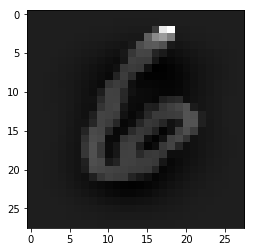

In [9]:
plt.imshow(X_train[13,:,:,0],cmap="gray")

In [12]:
def convertToOneHot(vector, num_classes=None):
    result = np.zeros((len(vector), num_classes), dtype='float32')
    result[np.arange(len(vector)), vector] = 1
    return result
print("class label")
print(Y_train[0:5])
print("class label in OneHot encodig")
print(convertToOneHot(Y_train[0:5], 10))

class label
[5 0 4 1 9]
class label in OneHot encodig
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


In [13]:
Y_train=convertToOneHot(Y_train,num_classes=10)
print(Y_train.shape)
Y_val=convertToOneHot(Y_val,num_classes=10)
print(Y_val.shape)

(2400, 10)
(600, 10)


In [14]:
# here we center and standardize the data
X_mean = np.mean( X_train, axis = 0)
X_std = np.std( X_train, axis = 0)

X_train = (X_train - X_mean ) / (X_std + 0.0001)
X_val = (X_val - X_mean ) / (X_std + 0.0001)

In [15]:
### First model with a convolutional layer
name = 'cnn1'
model = Sequential()
# this applies 32 convolution filters of size 3x3 each.

model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(28, 28, 1)))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 28, 28, 32)    320         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 28, 28, 32)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
flatten_1 (Flatten)              (None, 25088)         0           activation_1[0][0]               
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 10)            250890      flatten_1[0][0]                  
___________________________________________________________________________________________

In [17]:
tensorboard = keras.callbacks.TensorBoard(
        log_dir='tensorboard/mnist/' + name + '/', 
        write_graph=True,
        histogram_freq=1)

In [18]:
history=model.fit(X_train, Y_train, 
                  batch_size=128, 
                  nb_epoch=6,
                  verbose=1, 
                  validation_data=(X_val, Y_val),
                  callbacks=[tensorboard])

Train on 2400 samples, validate on 600 samples
INFO:tensorflow:Summary name convolution2d_1_W:0 is illegal; using convolution2d_1_W_0 instead.
INFO:tensorflow:Summary name convolution2d_1_b:0 is illegal; using convolution2d_1_b_0 instead.
INFO:tensorflow:Summary name dense_1_W:0 is illegal; using dense_1_W_0 instead.
INFO:tensorflow:Summary name dense_1_b:0 is illegal; using dense_1_b_0 instead.
Epoch 1/6
2400/2400 [==============================] - 4s - loss: 0.8900 - acc: 0.7300 - val_loss: 0.5924 - val_acc: 0.8683

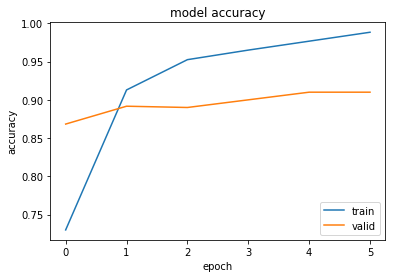

In [19]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.show()

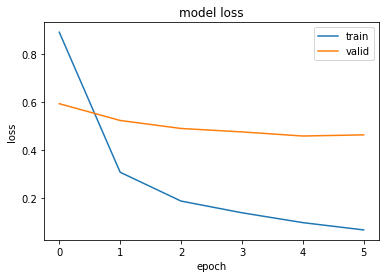

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [ ]:
#!tensorboard --logdir=tensorboard/tensorboard/mnist/